In [1]:
import numpy as np
import scipy.interpolate as si
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
def ronchi(n, m, d, phi, xoff, neg=False):
    x, y = np.meshgrid(np.arange(n), np.arange(m))
    xp = x*np.cos(phi*np.pi/180) + y*np.sin(phi*np.pi/180) + xoff
    b = np.floor(xp/d)
    return np.bitwise_xor(~np.abs(b % 2).astype(bool), neg)

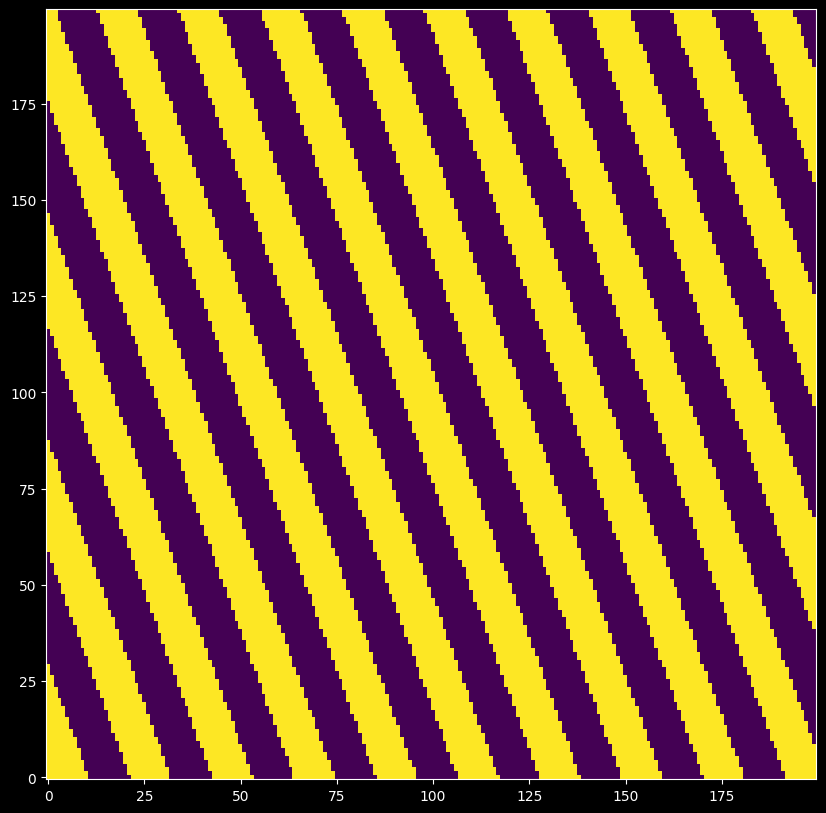

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

nxy = 200
r = ronchi(nxy, nxy, 10, 20, 0)
ax.imshow(r, interpolation='none', origin='lower', )

In [4]:
def ronchigram(a, f, d, zoff, phi, sph, coma, astig, defocus, n, m, neg=False, xsize=1):
    # normalize variables
    fn = f/a
    zn = zoff/a
    dn = d/a
    
    # calculate defocus
    rn = 2*fn
    
    # calculate magnification
    if (zn == 0):
        mag = -rn
    else:
        mag = -rn/zn
        
    # define the normal coordinates
    x, y = np.meshgrid(np.linspace(-1, 1, n), np.linspace(-1, 1, m))
    
    # calculate the aberrated coordinates
    xa = x-mag*rn*(4*sph*x*(x**2 + y**2) + 2*coma*x*y + 2*astig*x + 2*defocus*x)
    ya = y-mag*rn*(4*sph*x*(x**2 + y**2) + coma*x**2 + 3*coma*y**2 + 6*astig*y + 2*defocus*y)
    
    # define the ronchi ruling pitch in pixels
    d1max = np.max(xsize*dn*np.abs(mag))
    d1 = np.round(np.where(d1max > 1, d1max, 1))
    
    # set a maximum normalized aberrated coordinates big enough to accommodate the abberated coordinates
    c = 2
    
    # redefine the magnified coordinates
    xm, ym = np.meshgrid(np.linspace(-c, c, c*n), np.linspace(-c, c, c*m))
    
    # xoff in pixels
    # o1 = c*xsize*mag*xoff
    o1 = c*xsize*mag*zoff
    
    # calculate the magnified ronchi ruling
    g1 = ronchi(c*n, c*m, d1, phi, o1, neg)
    
    # interpolate the ruling function on aberrated coordinates
    return si.griddata(
        (x.flatten(), y.flatten()), 
        g1.flatten(),
        (xa, ya)
    )

In [5]:
rg = ronchigram(a=25, f=200, d=0.1, zoff=-30, phi=0, sph=0, coma=0, astig=0, defocus=0, n=200, m=200, neg=False, xsize=1)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(rg, origin='lower', interpolation='none')

ValueError: different number of values and points